In [ ]:
# Generates XRD refinement figure with a subplot for (hkl) reflections

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import matplotlib.ticker as tick
from matplotlib.ticker import FormatStrFormatter
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple

from matplotlib.pyplot import rc
rc("text", usetex=True)
rc("font", **{"family":"sans-serif","sans-serif":["Helvetica"]},size="14")
rc("text.latex",preamble=r"\usepackage{sfmath}")

%matplotlib notebook

In [14]:
# import data
# change number of variables according to current dataset
# change/delete delimiter and skiprows as necessary

# XRD data + refinement
tt, y_obs, sig_obs, y_calc, diff = \
        np.loadtxt("C:/Users/sincl/Documents/MaughanLab/11-BM-B/2022_07_11BM/SRC001-020_Li3ScCl6/SRC001-020_no_antisite/SRC001-020_no_adj.txt",
        unpack=True, dtype=float, delimiter=",", skiprows=2) 

# (hkl) reflections
h_Li3ScCl6, k_Li3ScCl6, l_Li3ScCl6, tt_Li3ScCl6, int_Li3ScCl6 = \
        np.loadtxt("C:/Users/sincl/Documents/MaughanLab/CIFs/Li3ScCl6_C2m_reflections_11BM.txt",
        unpack=True, dtype=float, skiprows=1)

h_LiCl, k_LiCl, l_LiCl, tt_LiCl, int_LiCl = \
        np.loadtxt("C:/Users/sincl/Documents/MaughanLab/CIFs/LiCl_Fm-3m_reflections_11BM.txt",
        unpack=True, dtype=float, skiprows=1)

In [ ]:
# converts to Q values from 2theta values if needed

wavelength_PXRD = 1.54
wavelength_11_BM_B = 0.458957
wavelength_11_ID_B = 0.14320
wavelength_17_BM_B = 0.24107

# conversion function, takes parameters tt (2theta) and wl (instrument wavelength)
def tt_to_q(tt,wl):
    Q = 4*np.pi*np.sin((tt*np.pi)/360)/wl
    return Q

# example: q_somedataset = tt_to_q(tt_somedataset, wavelength_PXRD)

<IPython.core.display.Javascript object>


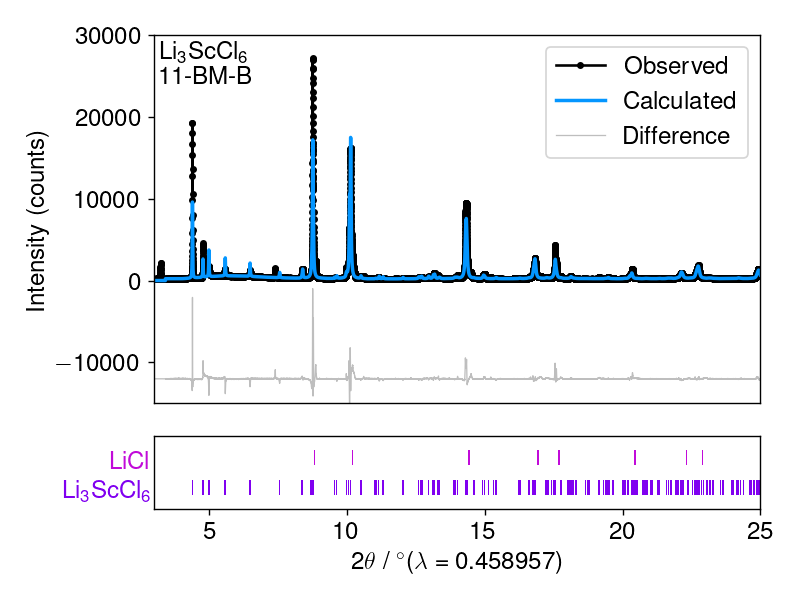

In [86]:
# generates subplot for data and subplot for (hkl) ticks
fig, (data, ticks) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1]})

# plot data, this just has one set of observed, calculated refinement, difference curves, but you can add as many as you want
# color takes hex codes, label is used for legends, marker + linewidth can be removed/added as needed
data.plot(tt, y_obs, label="Observed", color="black", marker=".")
data.plot(tt, y_calc, label="Calculated", color="#0496FF", linewidth="2")
data.plot(tt, diff-12000, label="Difference", color="#BEBEBE", linewidth="0.75")

# set axis limits on data plot if needed
data.set_xlim(3,25)
data.set_ylim(-15000,30000)

# removes x-axis text from data plot
data.get_xaxis().set_ticklabels([])
data.get_xaxis().set_ticks([])
data.set(xlabel=None)

# plot (hkl) reflection ticks, can add more as needed
ticks.bar(tt_Li3ScCl6, height=0.1, width=0.05, bottom=0.1, align='center', data=None, color="#8000F0")
ticks.bar(tt_LiCl, height=0.1, width=0.05, bottom=0.3, align='center', data=None, color="#C10BD9")

# set axis limits on ticks plot if needed
ticks.set_xlim(3,25)
ticks.set_ylim(0,.5)

# removes y-axis text from ticks plot
ticks.get_yaxis().set_visible(False)

# add text labels for ticks
ticks.text(-0.3, 0.075, "Li$_3$ScCl$_6$", color="#8000F0")
ticks.text(1.4, 0.275, "LiCl", color="#C10BD9")

# x-axis labels
# PXRD
#ticks.set_xlabel("2" r"$\theta$" " / " r"$^{\circ}$" "(Cu K"r"$\alpha$"")")
# 11-BM-B
ticks.set_xlabel("2" r"$\theta$" " / " r"$^{\circ}$" "($\lambda=0.458957$)")
# converted to Q
#ticks.set_xlabel("Q (\AA" r"$^{-1}$, $\lambda=0.458957$" ")")

# y-axis label
data.set_ylabel("Intensity (counts)")

# set title
# above figure title
#data.title.set_text("$Li_{3}ScCl_6$")
# in-figure title
data.text(3.2, 27000, "Li$_{3}$ScCl$_6$")
data.text(3.2, 24000, "11-BM-B")

data.legend()
plt.tight_layout()

# saves PNG image of figure
#plt.savefig("C:/Users/sincl/Desktop/SRC001-020.png",bbox_inches='tight',dpi=1000)